In [1]:
! git clone https://github.com/APARNA-AMBARAPU/CNN--SDC-Simulator.git

Cloning into 'CNN--SDC-Simulator'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 24698 (delta 10), reused 0 (delta 0), pack-reused 24670
Receiving objects: 100% (24698/24698), 321.56 MiB | 15.15 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (24671/24671), done.


In [2]:
! ls CNN--SDC-Simulator

attempta.ipynb	drive.py  driving_log.csv  IMG	model2.h5  README.md


In [3]:
import numpy as np
import ntpath
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution2D, Flatten, Dense, Flatten, Dropout
import cv2
from imgaug import augmenters as iaa

Using TensorFlow backend.


In [0]:
data = pd.read_csv('CNN--SDC-Simulator/driving_log.csv',names = ['center','left','right','steering','throttle','reverse','speed'])

In [24]:
data.head()

center  ...         speed
0  C:\Users\Hari\OneDrive\Documents\New folder\IM...  ...  2.431211e-07
1  C:\Users\Hari\OneDrive\Documents\New folder\IM...  ...  7.316122e-06
2  C:\Users\Hari\OneDrive\Documents\New folder\IM...  ...  2.573447e-06
3  C:\Users\Hari\OneDrive\Documents\New folder\IM...  ...  4.271285e-06
4  C:\Users\Hari\OneDrive\Documents\New folder\IM...  ...  1.345338e-05

[5 rows x 7 columns]

In [25]:
data = data[['center','steering']]
data.head()

center  steering
0  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
1  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
2  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
3  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
4  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0

In [26]:
data.head()

center  steering
0  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
1  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
2  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
3  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0
4  C:\Users\Hari\OneDrive\Documents\New folder\IM...       0.0

In [0]:
def path_name(name):
  head,tail = ntpath.split(name)
  return tail

In [0]:
data['center'] = data['center'].apply(path_name)

In [29]:
data.head()

center  steering
0  center_2020_05_29_21_24_19_079.jpg       0.0
1  center_2020_05_29_21_24_19_148.jpg       0.0
2  center_2020_05_29_21_24_19_217.jpg       0.0
3  center_2020_05_29_21_24_19_293.jpg       0.0
4  center_2020_05_29_21_24_19_362.jpg       0.0

<BarContainer object of 25 artists>

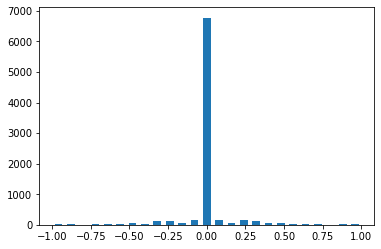

In [35]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)

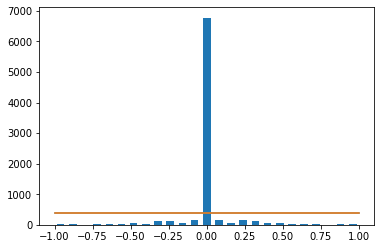

In [36]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.plot([-1,1],[400,400])

In [37]:
num_bins = 25
samples_per_bin = 400
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

total data: 8222
removed: 6377
remaining: 1845


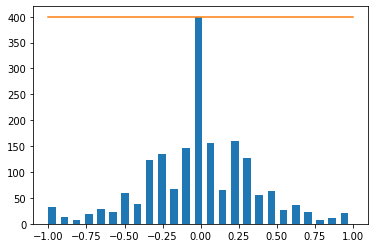

In [38]:
plt.hist(data['steering'],bins,width = 0.05)
plt.plot([-1,1],[400,400])

In [0]:
def dataset_image_load (data):
  path_of_img = []
  steer_ang = []
  for i in range(len(data)):
    df_row = data.iloc[i]
    center = df_row[0]
    path_of_img.append('CNN--SDC-Simulator/IMG/'+center)
    steer_ang.append(df_row[1])
  path_of_img = np.asarray(path_of_img)
  steer_ang = np.asarray(steer_ang)
  return path_of_img, steer_ang


In [0]:
images_path,steering_angle = dataset_image_load(data)

In [41]:
print(len(images_path))
print(len(steering_angle))

1845
1845


In [0]:
X_train, X_val, y_train, y_val = train_test_split(images_path,steering_angle,test_size = 0.2,random_state = 2)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1476,)
(1476,)
(369,)
(369,)


Text(0.5, 1.0, 'Validation Dataset')

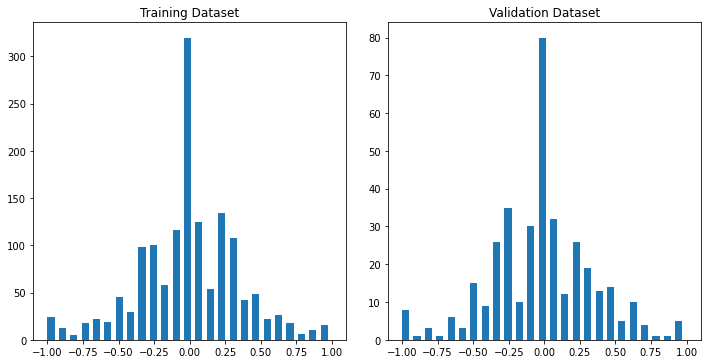

In [44]:
 fig,axes = plt.subplots(1,2,figsize = (10,5))
 fig.tight_layout()

 axes[0].hist(y_train,bins,width = 0.05)
 axes[0].set_title('Training Dataset')

 axes[1].hist(y_val,bins,width = 0.05)
 axes[1].set_title('Validation Dataset')

In [0]:
def zoom_aug(img):
  zoom_aug = iaa.Affine(scale =(1,1.3))
  img = zoom_aug.augment_image(img)
  return img

Text(0.5, 1.0, 'Zoomed Image')

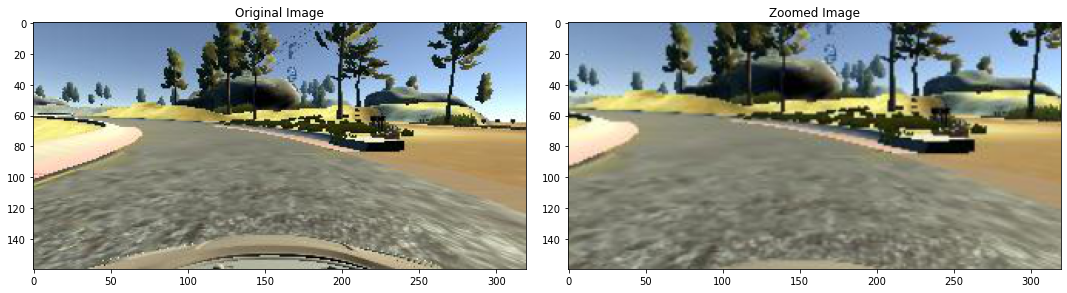

In [46]:
r = random.randint(0,len(X_val))
img = images_path[r]
org_img = mpimg.imread(img)
zoom_img = zoom_aug(org_img)

fig,axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Original Image')

axs[1].imshow(zoom_img)
axs[1].set_title('Zoomed Image')

In [0]:
def pan_aug(img):
  pan_aug = iaa.Affine(translate_percent= {'x' : (-0.1,0.1), 'y' : (-0.1,0.1)})
  img = pan_aug.augment_image(img)
  return img

Text(0.5, 1.0, 'Panned Image')

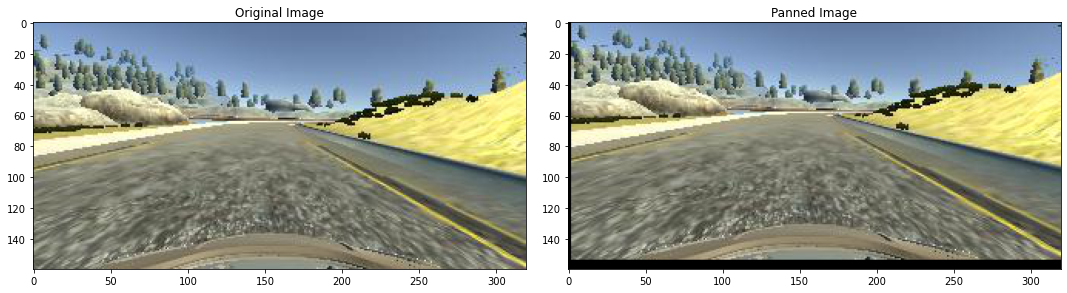

In [48]:
r = random.randint(0,len(X_val))
img = images_path[r]
org_img = mpimg.imread(img)
pan_img = pan_aug(org_img)

fig,axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Original Image')

axs[1].imshow(pan_img)
axs[1].set_title('Panned Image')

In [0]:
def brightness_aug(img):
  bright_aug = iaa.Multiply((0.5,1.3))
  img = bright_aug.augment_image(img)
  return img

Text(0.5, 1.0, 'Brightness Altered Image')

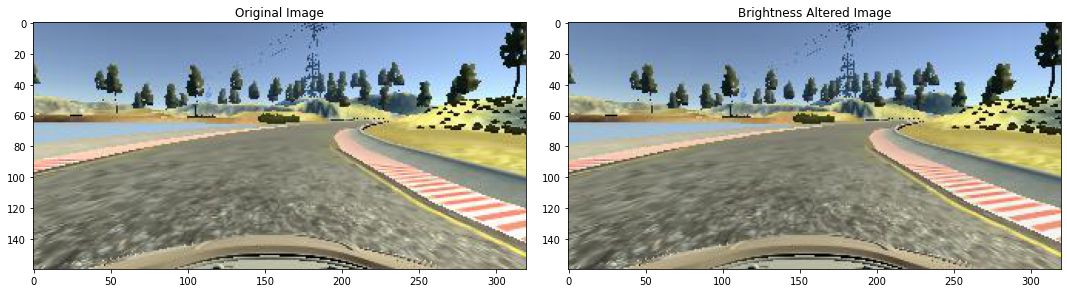

In [50]:
r = random.randint(0,len(X_val))
img = images_path[r]
org_img = mpimg.imread(img)
bright_img = brightness_aug(org_img)

fig,axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Original Image')

axs[1].imshow(bright_img)
axs[1].set_title('Brightness Altered Image')

In [0]:
def flip(img,steer_ang):
  img = cv2.flip(img,1)
  steer_ang = -steer_ang
  return img, steer_ang

Text(0.5, 1.0, 'Flipped Image - steer : 0.4')

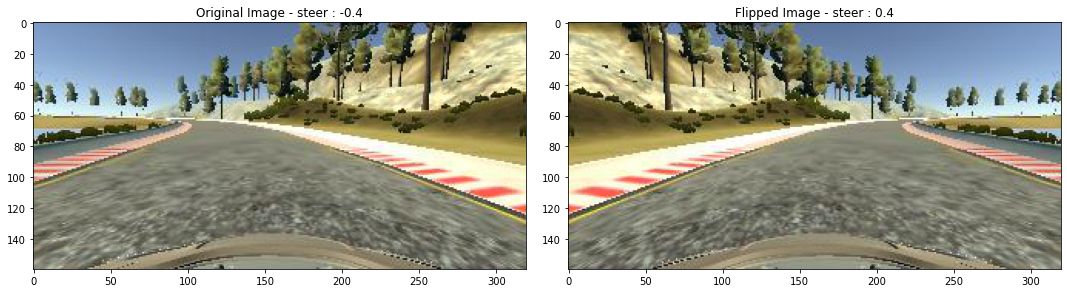

In [52]:
r = random.randint(0,len(X_val))
img = images_path[r]
org_img = mpimg.imread(img)
flipped_img, steer = flip(org_img, steering_angle[r])

fig,axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Original Image - steer : {}'.format(steering_angle[r]))

axs[1].imshow(flipped_img)
axs[1].set_title('Flipped Image - steer : {}'.format(steer))

In [0]:
def random_augmentation(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan_aug(image)
    if np.random.rand() < 0.5:
      image = zoom_aug(image)
    if np.random.rand() < 0.5:
      image = brightness_aug(image)
    if np.random.rand() < 0.5:
      image, steering_angle = flip(image, steering_angle)
    
    return image, steering_angle


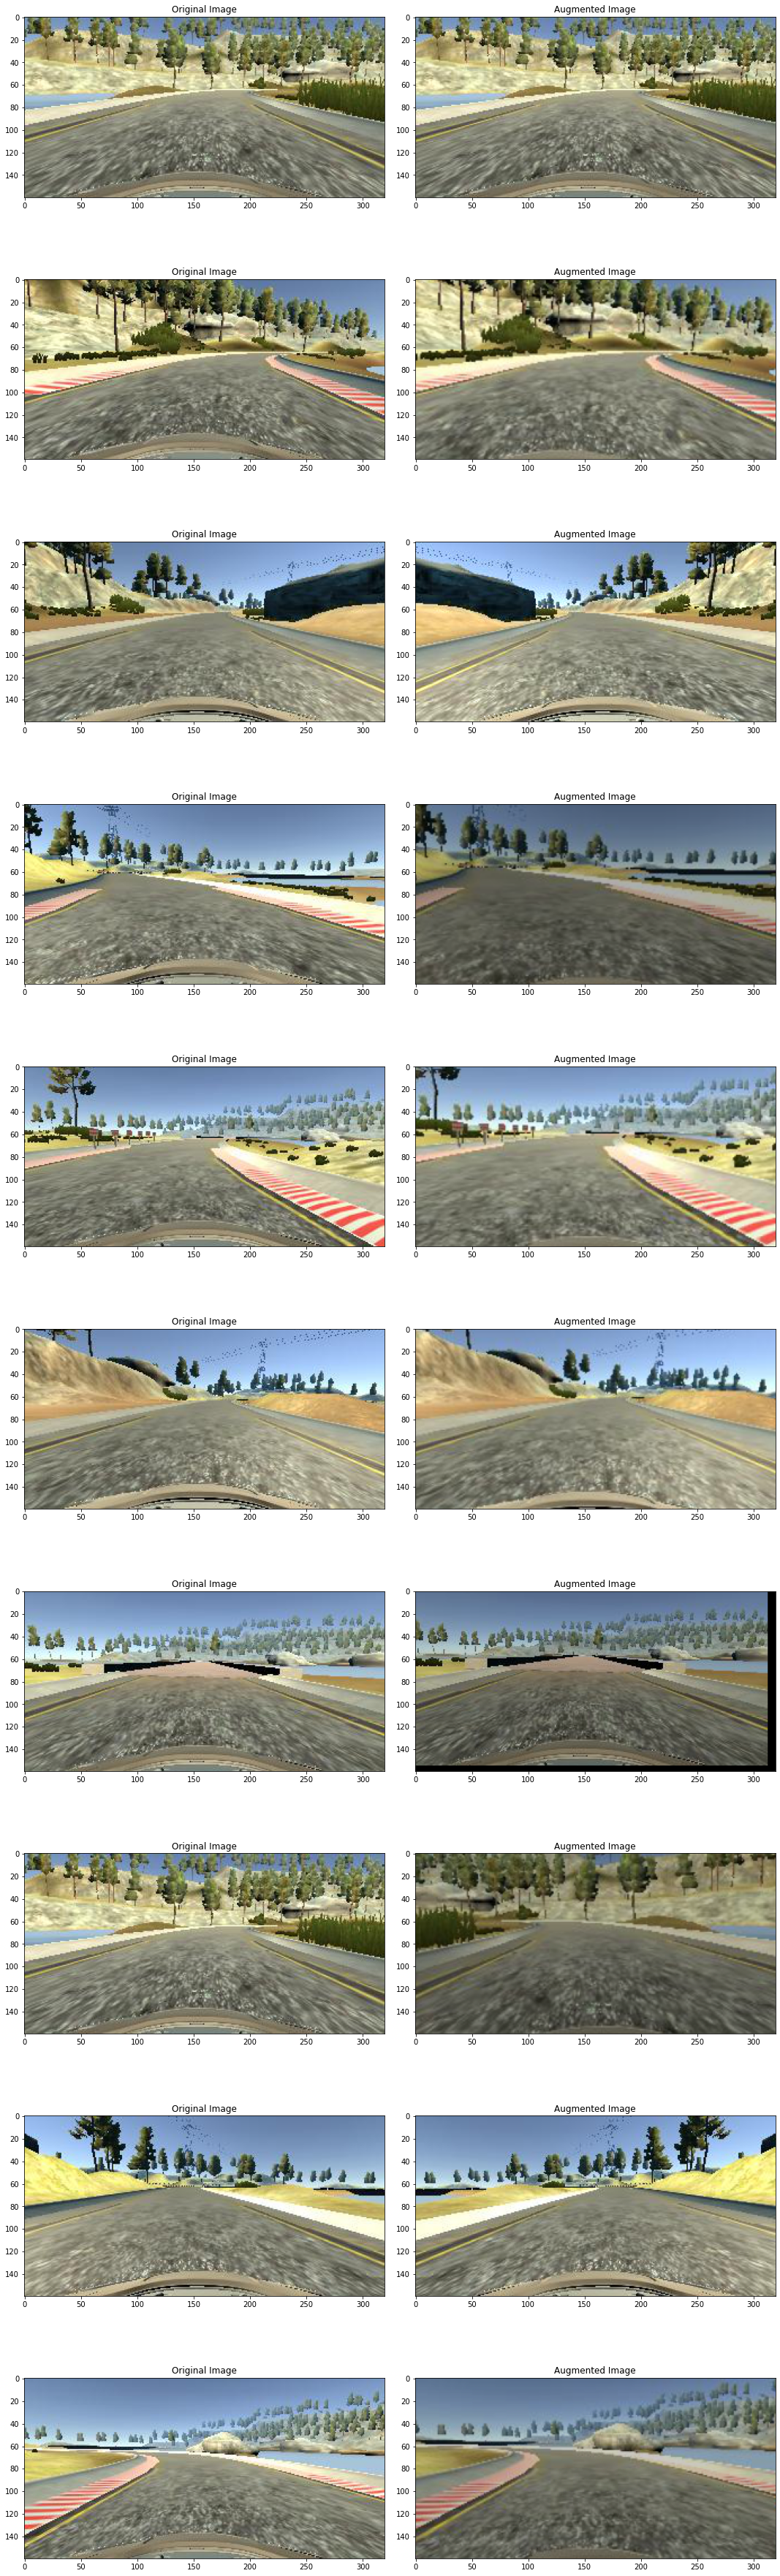

In [60]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(images_path) - 1)
  random_image = images_path[randnum]
  random_steering = steering_angle[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augmentation(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [0]:
def preprocess(img):
  img = img[60:140,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

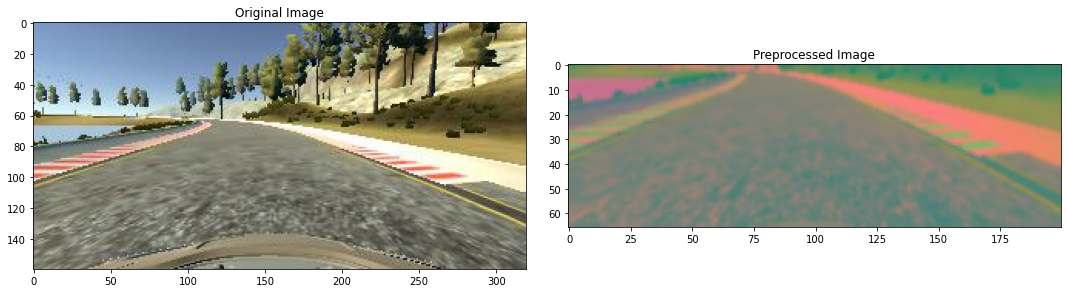

In [62]:
r = random.randint(0,1000)
img = images_path[r]
org_img = mpimg.imread(img)
preprocessed_img = preprocess(org_img)

fig,axs = plt.subplots(1,2,figsize= (15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Original Image')

axs[1].imshow(preprocessed_img)
axs[1].set_title('Preprocessed Image')

In [0]:
def batch_generator(image_paths,steering_angle,batch_size,is_train):
  while True:
    batch_img = []
    steer_ang = []

    for i in range(batch_size):
      random_index = random.randint(0,len(image_paths) - 1)
      if is_train:
        img, steer = random_augmentation(image_paths[random_index],steering_angle[random_index])
      else:
        img = mpimg.imread(images_path[random_index])
        steer  =  steering_angle[random_index]

      img = preprocess(img)
      batch_img.append(img)
      steer_ang.append(steer)

    yield (np.asarray(batch_img), np.asarray(steer_ang)) 


In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))

  model.add(Dense(50, activation = 'elu'))
  
  model.add(Dense(10, activation = 'elu'))
 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [65]:
model = nvidia_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  


In [0]:
h = model.fit_generator(batch_generator(images_path,steering_angle,batch_size=100, is_train=1), 
                        steps_per_epoch= 300, 
                        epochs  = 10, 
                        validation_data = batch_generator(X_val,y_val,100,0),
                        validation_steps = 200,
                        shuffle = 1, verbose = 1)

In [0]:
loss = h.history['loss']
val_loss = h.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('LOSS')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'])

In [0]:
model.save('final.h5')

In [0]:
from google.colab import files
files.download('final.h5')